In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline

In [192]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
all_data = [data_train, data_test]

In [193]:
display(data_train.head())
display(data_test.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [222]:
display(data_train.isnull().sum())
display(data_raw.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Family         0
dtype: int64

In [223]:
data_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0.5,1,'Total Survived')

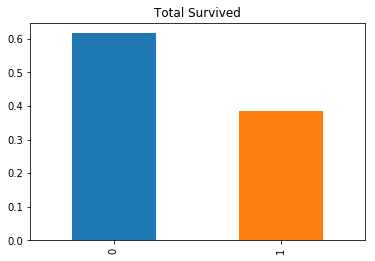

In [224]:
data_train['Survived'].value_counts(normalize=True).plot(kind='bar')
plt.title('Total Survived')

Text(0.5,1,'Men Survived')

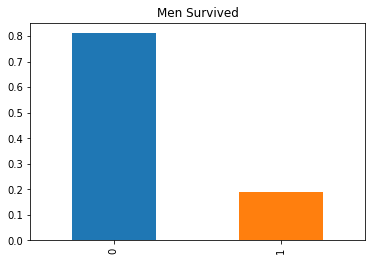

In [225]:
data_train['Survived'][data_train['Sex'] == 'male'].value_counts(normalize=True).plot(kind='bar')
plt.title('Men Survived')

Text(0.5,1,'Women Survived')

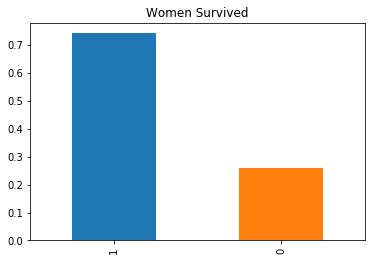

In [227]:
data_train['Survived'][data_train['Sex'] == 'female'].value_counts(normalize=True).plot(kind='bar')
plt.title('Women Survived')

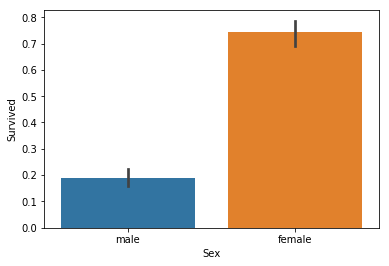

In [228]:
sns.barplot(x='Sex', y='Survived', data=data_train)

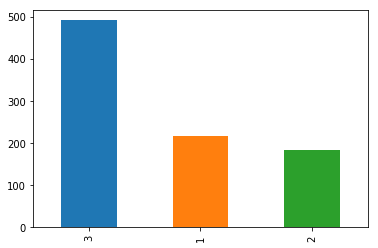

In [234]:
data_train['Pclass'].value_counts(normalize=False).plot(kind='bar')

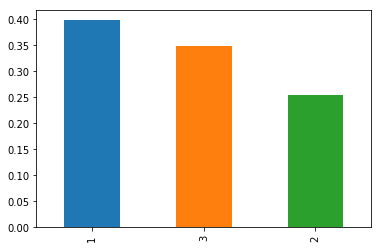

In [235]:
data_train['Pclass'][data_train['Survived'] == 1].value_counts(normalize=True).plot(kind='bar')

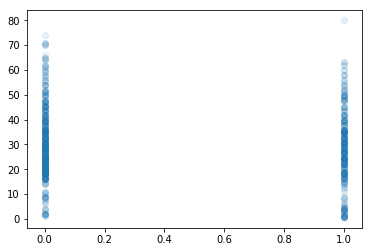

In [247]:
plt.scatter(y=data_train['Age'], x=data_train['Survived'], alpha=0.1)

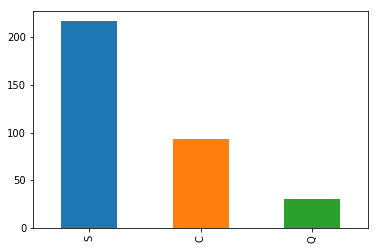

In [248]:
data_train['Embarked'][data_train['Survived'] == 1].value_counts().plot(kind='bar')

In [249]:
def toFill(data):
    for dataset in all_data:
        dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
        dataset['Fare'].fillna(dataset['Fare'].median(), inplace=True)
        dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)
    return dataset
toFill(all_data)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [250]:
def toDrop(data):
    for dataset in data:
        dataset.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
    return dataset
toDrop(all_data)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
5,897,3,male,14.0,0,0,9.2250,S
6,898,3,female,30.0,0,0,7.6292,Q
7,899,2,male,26.0,1,1,29.0000,S
8,900,3,female,18.0,0,0,7.2292,C
9,901,3,male,21.0,2,0,24.1500,S


In [251]:
for dataset in all_data:
    dataset['Sex'] = dataset['Sex'].apply(lambda x: 0 if x == 'male' else 1)
    dataset['Embarked'] = dataset['Embarked'].replace({'S':0, 'C':1, 'Q':2})
    dataset['Family'] = dataset['SibSp'] + dataset['Parch']

In [252]:
for dataset in all_data:
    dataset['Family'] = dataset['Family'].apply(lambda x: 1 if x > 0 else x)

In [253]:
data_test['Embarked'].value_counts()

0    270
1    102
2     46
Name: Embarked, dtype: int64

In [254]:
numerical = ['Age', 'Pclass', 'Embarked', 'Family']

for dataset in all_data:
    dataset[numerical] = dataset[numerical].astype('int')

In [255]:
def toSkew(data):
    for dataset in all_data:
        dataset['Fare'] = dataset['Fare'].apply(lambda x: np.log(x+1))
    return dataset
toSkew(all_data)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,892,3,0,34,0,0,2.178064,2,0
1,893,3,1,47,1,0,2.079442,0,1
2,894,2,0,62,0,0,2.369075,2,0
3,895,3,0,27,0,0,2.268252,0,0
4,896,3,1,22,1,1,2.586824,0,1
5,897,3,0,14,0,0,2.324836,0,0
6,898,3,1,30,0,0,2.155152,2,0
7,899,2,0,26,1,1,3.401197,0,1
8,900,3,1,18,0,0,2.107689,1,0
9,901,3,0,21,2,0,3.224858,0,1


In [256]:
for dataset in all_data:
    dataset.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [257]:
features = data_train[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family']].values
target = data_train['Survived'].values
passenger = data_test['PassengerId']
data_train.drop('Survived', axis=1, inplace=True)

In [258]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

In [259]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [260]:
#model = AdaBoostClassifier(random_state=42)
#model = RandomForestClassifier(random_state=42)
#model = DecisionTreeClassifier(random_state=42)
#model = SVC(random_state=42)
#model = LogisticRegression(random_state=42)
model = GradientBoostingClassifier(random_state=42)
model_ = model.fit(X_train, y_train)
model_.score(X_train, y_train)

0.8952095808383234

In [261]:
y_pred = model.predict(X_test)
#y_pred.score(X_test, y_test)

In [262]:
accuracy_score(y_pred, y_test)

0.8071748878923767

In [263]:
predictions = model.predict(data_test.drop('PassengerId', axis=1))

In [264]:
submission = pd.DataFrame({"PassengerId": passenger, "Survived": predictions})

In [265]:
submission.shape

(418, 2)

In [267]:
submission.to_csv('kaggle-submission')